In [89]:
import numpy as np
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import palettable
import pandas as pd

import graphs

In [90]:
import matplotlib.ticker as ticker
mpl.rcParams["axes.prop_cycle"] = mpl.cycler("color", palettable.matplotlib.Inferno_6.mpl_colors)
# mpl.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.sans-serif'] = 'Roboto'

inferno = palettable.matplotlib.Inferno_5
burgundy = palettable.cartocolors.sequential.RedOr_4_r
peach = palettable.cartocolors.sequential.Peach_5_r
plasma = palettable.matplotlib.Plasma_7
blueY = palettable.cartocolors.sequential.BluYl_5_r
teal = palettable.cartocolors.sequential.Teal_4_r
purple = palettable.cartocolors.sequential.PurpOr_4_r
sunset = palettable.cartocolors.sequential.agSunset_5
pinkYl = palettable.cartocolors.sequential.PinkYl_5_r
mint = palettable.cartocolors.sequential.Mint_5_r
magenta = palettable.cartocolors.sequential.Magenta_5
burgyl = palettable.cartocolors.sequential.BurgYl_4_r
tealgrn = palettable.cartocolors.sequential.TealGrn_4_r



# Semiconductor costs

In [91]:
#based on imageJ analysis, lol.
chip_design_cost = pd.DataFrame({
    "IP qualification": [2.6,3.8,5.0,6.4,8.9,14.2,24.1, 31.3, 45.8],
    "Architecture": [2.35,2.9, 3.9, 5.0, 7.2,10.9,18.1, 22.5, 29.5],
    "Verification": [6.0,8.3,11.8,16.5,23.4,36.6, 63.1, 85.4, 113.6],
    "Physical": [2.5,3.9,4.6,5.8,9.5, 15.1, 29.0, 40.2, 52.9],
    "Software": [9.5,11.6,17.3,25.0,39.1,66.9,118.0,194.7,255.6],
    "Prototype": 0,
    "Validation": [2.9,4.7,6.3,7.9,12.0,18.9,29.7,44.1,51.2],
    "IBC total": [28.5, 37.7, 51.3, 70.3, 106.3, 174.4, 297.8, 449, 581]
}, index=["65nm","40nm","28nm","22nm","16nm","10nm","7nm","5nm","3nm"])

chip_design_cost["Subtotal"] = chip_design_cost.drop("IBC total", axis=1).sum(axis=1)
chip_design_cost["Prototype"] = chip_design_cost["IBC total"] - chip_design_cost["Subtotal"]
chip_design_cost["Transistor count"] = np.array([305052.789027,805842.187761,2308241.52676,2600000,5000000,8000000,21100000,39500000,58200000])*1000
chip_design_cost

,IP qualification,Architecture,Verification,Physical,Software,Prototype,Validation,IBC total,Subtotal,Transistor count
65nm,2.6,2.35,6.0,2.5,9.5,2.65,2.9,28.5,25.85,3.050528e+08
40nm,3.8,2.90,8.3,3.9,11.6,2.50,4.7,37.7,35.20,8.058422e+08
28nm,5.0,3.90,11.8,4.6,17.3,2.40,6.3,51.3,48.90,2.308242e+09
22nm,6.4,5.00,16.5,5.8,25.0,3.70,7.9,70.3,66.60,2.600000e+09
16nm,8.9,7.20,23.4,9.5,39.1,6.20,12.0,106.3,100.10,5.000000e+09
10nm,14.2,10.90,36.6,15.1,66.9,11.80,18.9,174.4,162.60,8.000000e+09
7nm,24.1,18.10,63.1,29.0,118.0,15.80,29.7,297.8,282.00,2.110000e+10
5nm,31.3,22.50,85.4,40.2,194.7,30.80,44.1,449.0,418.20,3.950000e+10
3nm,45.8,29.50,113.6,52.9,255.6,32.40,51.2,581.0,548.60,5.820000e+10


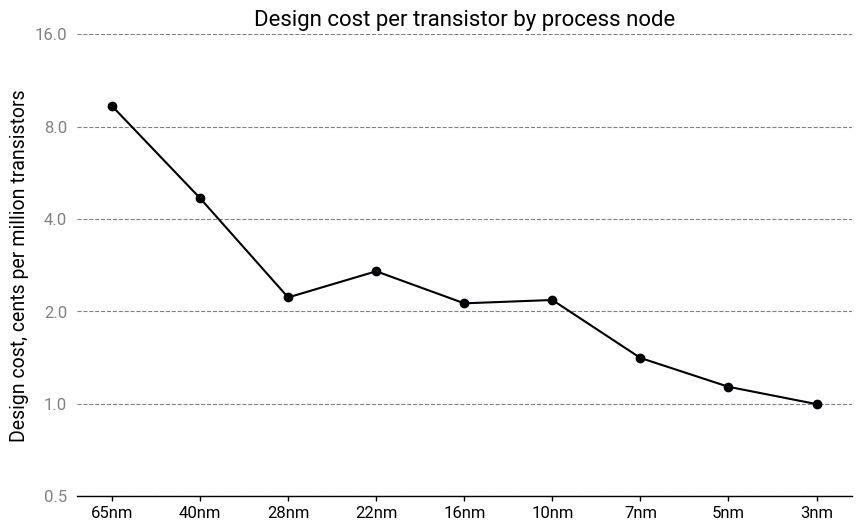

In [102]:
normalized_design_cost = chip_design_cost["IBC total"]/(chip_design_cost["Transistor count"]/1e6)*100

fig, ax = plt.subplots(1,1)

ax = normalized_design_cost.plot(ax=ax, marker='o')

ax.set_yscale('log', base=2)
# Add grey y-axis gridlines and change y-tick colors
ax.grid(axis='y', color='grey', linestyle='--', zorder=0)
ax.tick_params(axis='y', colors='grey', left=False)

# Remove all spines except bottom (x-axis)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
ax.set_ylim(2**-1, 2**4)
ax.set_ylabel("Design cost, cents per million transistors")
ax.set_title("Design cost per transistor by process node")
fig.set_size_inches(10,6)

Text(0.5, 1.0, 'Chip design cost structure by process node')

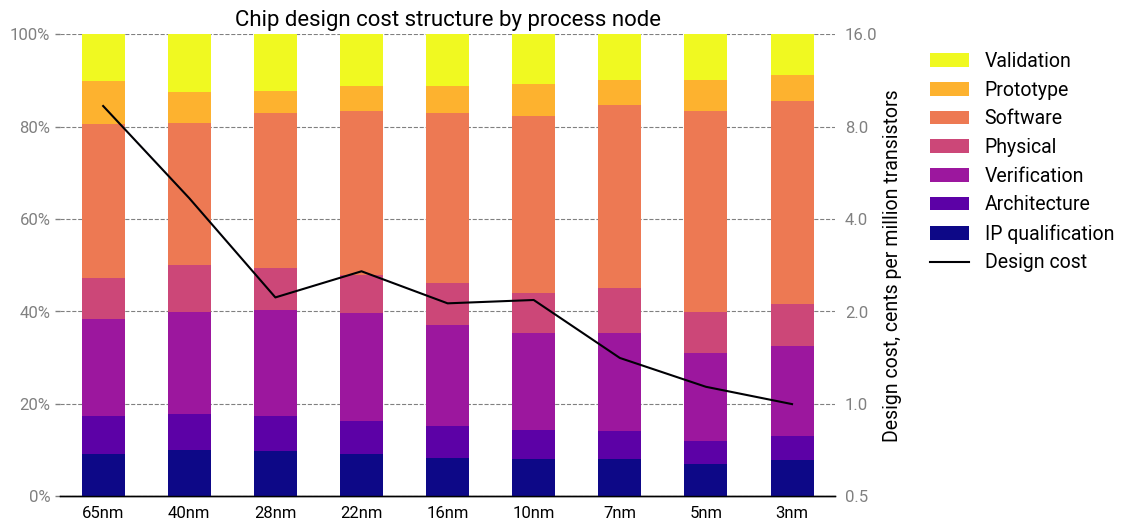

In [103]:
frac_chip_cost = chip_design_cost.drop(columns=["IBC total", "Subtotal", "Transistor count"]).div(chip_design_cost["IBC total"], axis=0)

fig, ax = plt.subplots(1,1)

brwnyl = palettable.cartocolors.sequential.BrwnYl_7.mpl_colors
ax = (frac_chip_cost).plot.bar(ax=ax, color=plasma.mpl_colors, stacked=True, zorder=3)

# Add grey y-axis gridlines and change y-tick colors
ax.grid(axis='y', color='grey', linestyle='--', zorder=0)
ax.tick_params(axis='y', colors='grey', left=False)
ax.tick_params(axis='x', bottom=False, labelrotation=0)

# Remove all spines except bottom (x-axis)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))
ax.set_ylim(0,1)
ax2 = ax.twinx()

ax2.plot(ax.get_xticks(), normalized_design_cost, label = "Design cost")

ax2.set_yscale('log', base=2)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax2.set_ylabel("Design cost, cents per million transistors")
ax2.set_yticks(np.logspace(-1, 4, base=2, num=6))
# ax2.set_ylim(0, 1.20)
ax2.tick_params(axis='y', colors='grey',left = False, right=False)
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
lines, labels = ax.get_legend_handles_labels()
lines2, labels2= ax2.get_legend_handles_labels()

# ax.set_xlabel("Total cost")

ax.legend(lines2 + lines, labels2 + labels, bbox_to_anchor=(1.1, 1), loc='upper left', reverse=True)
fig.set_size_inches(10,6)
ax.set_title("Chip design cost structure by process node")


# Cost structure inelasticity principle

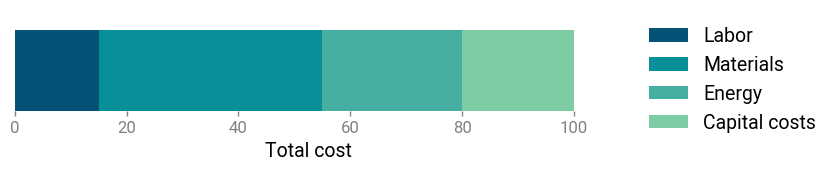

In [94]:
labels = 'Labor','Materials','Energy','Capital costs'
base_case = np.array([15, 40, 25, 20])

df_costs = pd.DataFrame(dict(zip(labels, base_case)), index=["Base case"])

fig, ax = plt.subplots(1,1)

df_costs.plot.barh(ax=ax, stacked=True, color=blueY.mpl_colors, width=1.0)
# Remove all spines except bottom (x-axis)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add grey y-axis gridlines and change y-tick colors
# ax.grid(axis='x', color='grey', linestyle='-', alpha=0.3)
ax.tick_params(axis='x', colors='grey')

# Remove x labels and ticks
ax.set_ylabel('')
ax.set_yticks([])
ax.tick_params(axis='y', which='both', length=0)

# Position legend to avoid overlap
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent legend cutoff
ax.set_ylim(-0.5, 0.75)
ax.set_xlabel("Total cost")
plt.tight_layout()
fig.set_size_inches(10, 1.25)

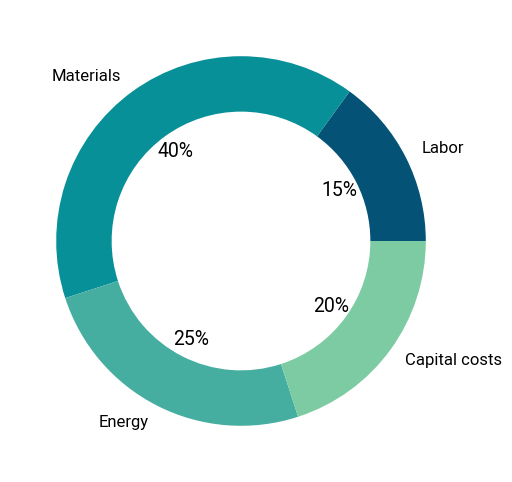

In [95]:
fig, ax = plt.subplots(1,1)
df_costs.T.plot.pie(y="Base case", ax = ax, legend=False, colors=blueY.mpl_colors,  autopct='%1.f%%', wedgeprops=dict(width=0.3))

ax.set_ylabel("")
fig.set_size_inches(6, 6)

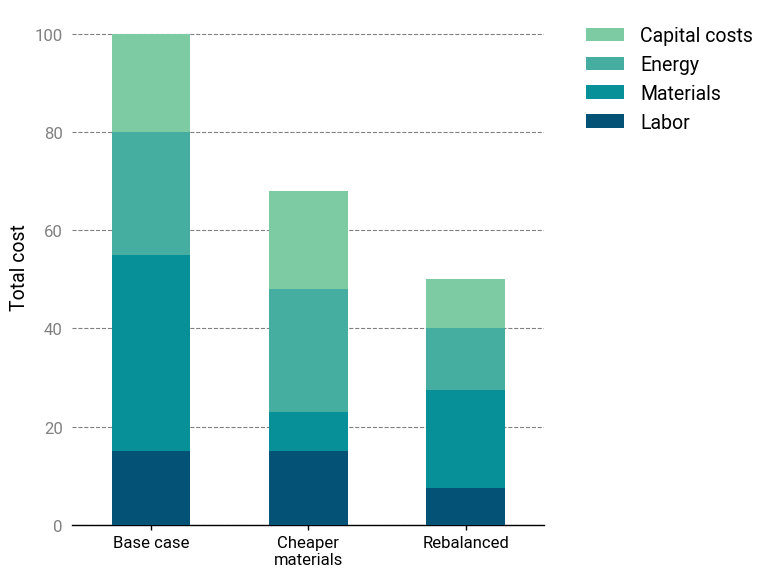

In [96]:
cheaper_B = base_case.copy()
cheaper_B[1] = cheaper_B[1]/5
rebalanced = base_case * 0.5

df_costs = pd.DataFrame({
    'Labor': [base_case[0], cheaper_B[0], rebalanced[0]],
    'Materials': [base_case[1], cheaper_B[1], rebalanced[1]], 
    'Energy': [base_case[2], cheaper_B[2], rebalanced[2]],
    'Capital costs': [base_case[3], cheaper_B[3], rebalanced[3]]
}, index=["Base case", "Cheaper\nmaterials", "Rebalanced"])

fig, ax = plt.subplots(1, 1)

df_costs.iloc[::1].plot.bar(ax=ax, stacked=True, color=blueY.mpl_colors, zorder=3)


# Remove all spines except bottom (x-axis)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)

# Add grey y-axis gridlines and change y-tick colors
ax.grid(axis='y', color='grey', linestyle='--', zorder=0)
ax.tick_params(axis='y', colors='grey', left=False)
ax.tick_params(axis='x', labelrotation=0)

# Remove x labels and ticks
# ax.set_ylabel('')
# ax.set_yticks([])
# ax.tick_params(axis='y', which='both', length=0)

# Position legend to avoid overlap
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', reverse=True)
ax.set_ylabel("Total cost")
fig.set_size_inches(8, 6)
# Adjust layout to prevent legend cutoff
# ax.set_ylim(-0.5, 2.5)  # Adjusted for 3 rows instead of 1
plt.tight_layout()

# Desalination

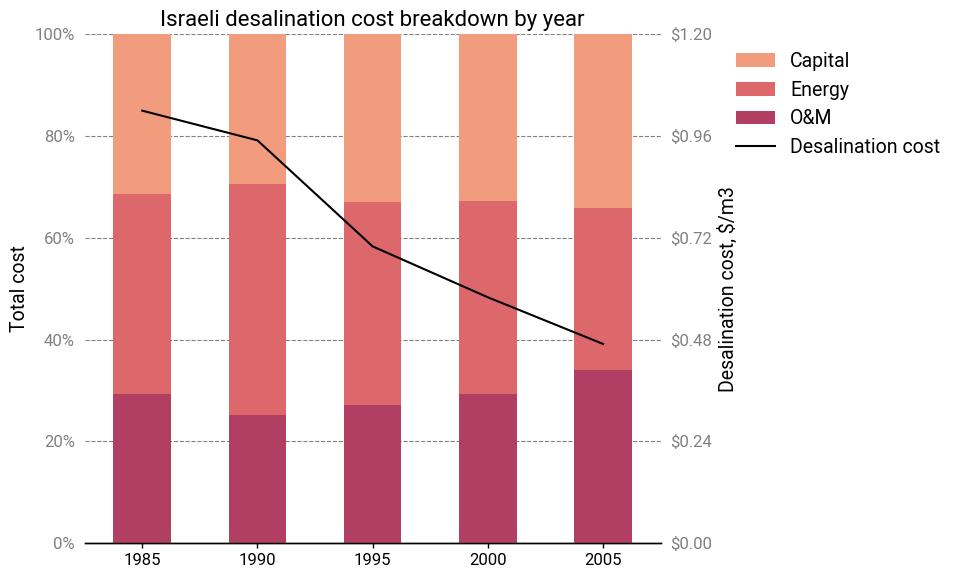

In [104]:
labels = "SWRO", "MED", "MSF"
desal_costs = pd.DataFrame({
    'CAPEX': [0.29, 0.29, 0.42],
    'Energy': [0.24, 0.06+0.31, 0.20+0.31],
    'Variable OPEX': [0.07, 0.08 + 0.01, 0.08+0.01], 
    'Fixed OPEX': [0.03+0.10+0.03, 0.08+0.01, 0.08 + 0.01],
}, index=["SWRO", "MED", "MSF"])

idc = pd.DataFrame({
    "O&M": [30, 24, 19, 17, 16],
    "Energy": [40, 43, 28, 22, 15],
    "Capital": [32, 28, 23, 19, 16],
}, index = [1985, 1990, 1995, 2000, 2005])

desal_costs["Total"] = desal_costs.sum(axis=1)
desal_costs["Energy"] /= desal_costs["Total"]
desal_costs["Variable OPEX"] /= desal_costs["Total"]
desal_costs["Fixed OPEX"] /= desal_costs["Total"]
desal_costs["CAPEX"] /= desal_costs["Total"]

idc["Total"] = idc.sum(axis=1)
idc["Energy"] /= idc["Total"]
idc["O&M"] /= idc["Total"]
idc["Capital"] /= idc["Total"]

fig, ax = plt.subplots(1,1)

idc.drop("Total", axis=1).iloc[::1].plot.bar(ax=ax, stacked=True, color=burgundy.mpl_colors, zorder=3)

ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), idc["Total"]/100, label="Desalination cost")

# Add grey y-axis gridlines and change y-tick colors
ax.grid(axis='y', color='grey', linestyle='--', zorder=0)
ax.tick_params(axis='y', colors='grey', left=False)
ax.tick_params(axis='x', labelrotation=0)
# Remove all spines except bottom (x-axis)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax2.set_ylabel("Desalination cost, $/m3")
ax2.set_ylim(0, 1.20)
ax2.set_yticks(np.linspace(0.0, 1.20, num=6))
ax2.tick_params(axis='y', colors='grey',left = False, right=False)

# ax.set_xlabel("Year")
ax.set_ylabel("Total cost")
ax.set_ylim(0, 1.0)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:.2f}"))
lines, labels = ax.get_legend_handles_labels()
lines2, labels2= ax2.get_legend_handles_labels()


ax.set_title("Israeli desalination cost breakdown by year")
# fig.suptitle("Israeli desalination cost breakdown by year")
ax.legend(lines2 + lines, labels2 + labels, bbox_to_anchor=(1.1, 1), loc='upper left', reverse=True)
fig.set_size_inches(10, 6)
plt.tight_layout()

In [98]:
idc

,O&M,Energy,Capital,Total
1985,0.294118,0.392157,0.313725,102
1990,0.252632,0.452632,0.294737,95
1995,0.271429,0.400000,0.328571,70
2000,0.293103,0.379310,0.327586,58
2005,0.340426,0.319149,0.340426,47


# Rocket reusability

In [99]:
def reuse_cost_index(n, F_ru, C_ru, C_rf, C_g, rate_exp=0.85):
    """Calculate the reuse cost index for a rocket.

    Args:
        n: Number of launches per rocket
        F_ru: Fraction of rocket that can be reused
        C_ru: Cost multiplier of a reusable rocket relative to an expendable one.
        C_rf: Cost to refurbish the rocket hardware as a fraction of hardware cost.
        C_g: Non-rocket costs.  
        rate_exp (float, optional): Learning rate for aerospace hardware. Defaults to 0.85.
    """
    F = 1.0/(rate_exp**np.log2(n))
    C_build = F*F_ru*C_ru + (1-F_ru)*C_ru
    C_hwl = (n-1)*(C_ru*(1-F_ru))
    C_rfl = (n-1)*C_ru*C_rf
    C_hw = (C_build+C_hwl+C_rfl)/n
    return C_g + (1-C_g)*C_hw

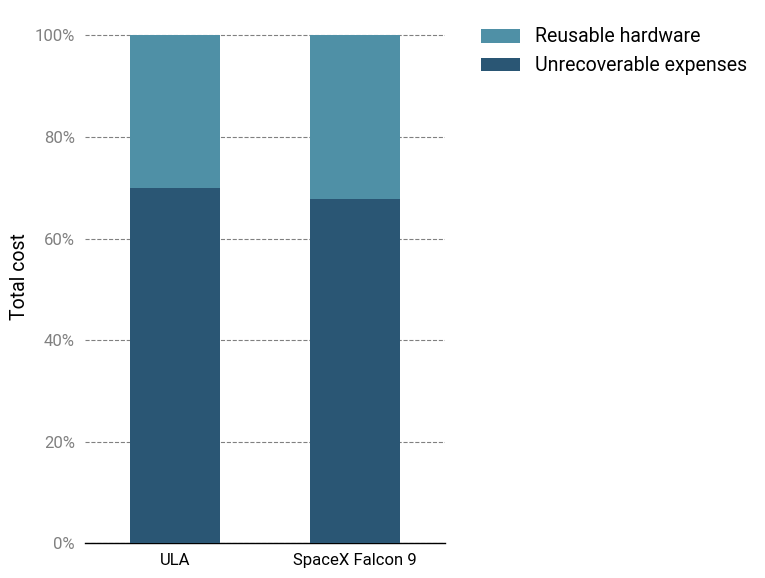

In [105]:
launch_costs = pd.DataFrame({
        "Unrecoverable expenses": [70/100, 19/28,],
        "Reusable hardware": [30/100, 9/28],
}, index=["ULA", "SpaceX Falcon 9"])


fig, ax = plt.subplots(1,1)

launch_costs.plot.bar(ax=ax, stacked=True, color=teal.mpl_colors, zorder=3, rot=0)

# Add grey y-axis gridlines and change y-tick colors
ax.grid(axis='y', color='grey', linestyle='--', zorder=0)
ax.tick_params(axis='y', colors='grey', left=False)
ax.tick_params(axis='x', bottom=False)

# Remove all spines except bottom (x-axis)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)


ax.set_ylabel("Total cost")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', reverse=True)
fig.set_size_inches(8, 6)
plt.tight_layout()

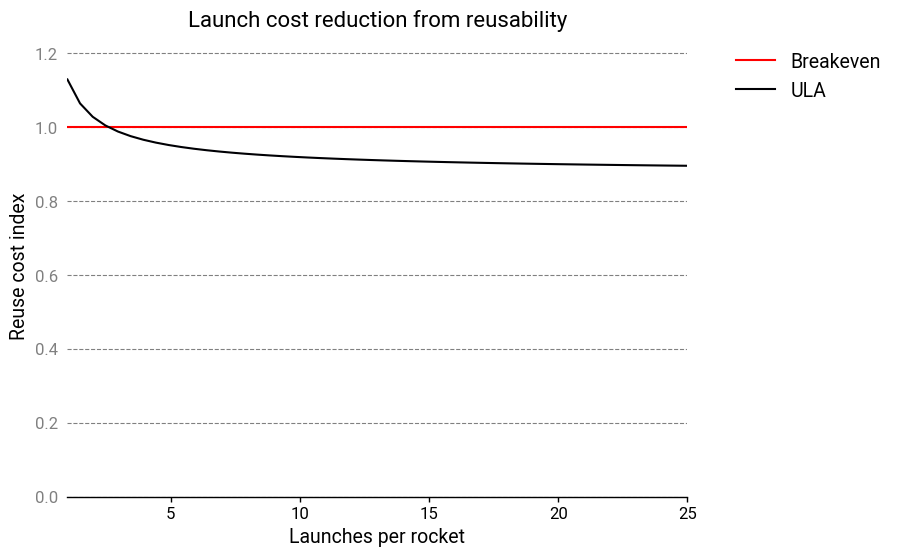

In [ ]:
num_launches = np.linspace(1, 25)

ULA_index = reuse_cost_index(num_launches, 0.7, 1.43, 0.1, 0.7)

fig, ax = plt.subplots(1,1)

ax.axhline(y=1.0, linestyle= "-", color="red", zorder=3, label="Breakeven")
ax.plot(num_launches, ULA_index, zorder=3, label="ULA")

ax.set_ylim(0, 1.25)
ax.set_ylabel("Reuse cost index")

ax.set_xlim(1, num_launches.max())
ax.set_xlabel("Launches per rocket")



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add grey y-axis gridlines and change y-tick colors
ax.grid(axis='y', color='grey', linestyle='--', zorder=0,)
ax.tick_params(axis='y', colors='grey', left=False)

ax.set_title("Launch cost reduction from reusability")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.set_size_inches(8, 6)

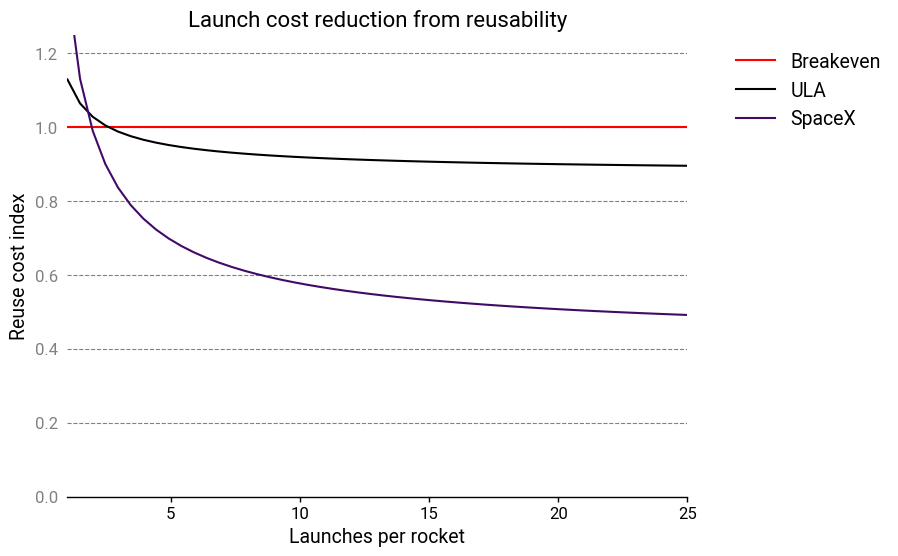

In [ ]:
SpaceX_index = reuse_cost_index(num_launches, 0.7/0.9, 1.43, 0.0167, 0.1)

fig, ax = plt.subplots(1,1)

ax.axhline(y=1.0, linestyle= "-", color="red", label="Breakeven")
ax.plot(num_launches, ULA_index, label="ULA")
ax.plot(num_launches, SpaceX_index, label="SpaceX")

ax.set_ylim(0, 1.25)
ax.set_ylabel("Reuse cost index")

ax.set_xlim(1, num_launches.max())
ax.set_xlabel("Launches per rocket")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add grey y-axis gridlines and change y-tick colors
ax.grid(axis='y', color='grey', linestyle='--', zorder=0)
ax.tick_params(axis='y', colors='grey', left=False)

ax.set_title("Launch cost reduction from reusability")
fig.set_size_inches(8, 6)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# ax.legend(ncol=2)

# Space Shuttle

In [ ]:
shuttle_costs = pd.DataFrame({
    "Flight cost": [78.7, 88.9, 22.9, 2.1, 51.5, 20.4, 52, 19.1, 22.5, 2.9, 45.3, 7.2],
    "Marginal cost": [4.2, 4.6, 3.7, 0, 10.2, 9.5, 10, 1.4, 0.8, 0, 0, 0]
}, index=[
    "Launch operations", 
    "Flight operations", 
    "Logistics operations", 
    "Propellants", 
    "Redesigned solid rocket motor", 
    "Solid rocket booster", 
    "External tank", 
    "Space shuttle main engines", 
    "Orbiter maintenance and support", 
    "Contract administration",
    "Civil service personnel and travel",
    "Space communications network support"])

shuttle_costs["Fixed cost"] = shuttle_costs["Flight cost"] - shuttle_costs["Marginal cost"]
shuttle_costs["Expense category"] = ""
shuttle_costs.loc[["Launch operations", "Flight operations", "Logistics operations", "Propellants"], "Expense category"] = "Operations"
shuttle_costs.loc[["Redesigned solid rocket motor", "Solid rocket booster", "External tank", "Space shuttle main engines", "Orbiter maintenance and support"], "Expense category"] = "Hardware"
shuttle_costs.loc[["Contract administration", "Civil service personnel and travel", "Space communications network support"], "Expense category"] = "Overhead"

simplified_shuttle = shuttle_costs.groupby(["Expense category"]).sum()
simplified_shuttle

,Flight cost,Marginal cost,Fixed cost
Expense category,,,
Hardware,165.5,31.9,133.6
Operations,192.6,12.5,180.1
Overhead,55.4,0.0,55.4


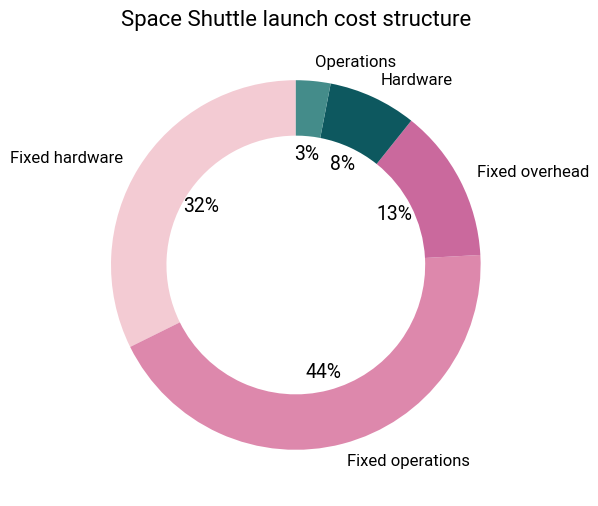

In [ ]:
import itertools
fig, ax = plt.subplots(1,1)

# simplified_shuttle[["Fixed cost", "Marginal cost"]].plot.pie(ax=ax, subplots=True, stacked=True)

shuttle_breakdown = pd.DataFrame({
    "Cost breakdown": pd.concat([simplified_shuttle["Fixed cost"], simplified_shuttle["Marginal cost"]]).values
}, index=["Fixed hardware", "Fixed operations", "Fixed overhead", "Hardware", "Operations", "Overhead"])

#explode marginal costs
explode = (0, 0, 0, 0.0, 0.0)

shuttle_colors = list(itertools.chain(magenta.mpl_colors[:3], mint.mpl_colors[::]))
shuttle_breakdown["Percent"] = shuttle_breakdown["Cost breakdown"] / shuttle_breakdown["Cost breakdown"].sum()
ax = shuttle_breakdown.drop("Overhead",axis=0).plot.pie(y="Percent", ax=ax, legend=False, colors=shuttle_colors, explode=explode,  autopct='%1.f%%', wedgeprops=dict(width=0.3), startangle=90)
ax.set_ylabel("")

ax.set_title("Space Shuttle launch cost structure")
fig.set_size_inches(6, 6)

In [ ]:
shuttle_costs

,Flight cost,Marginal cost,Fixed cost,Expense category
Launch operations,78.7,4.2,74.5,Operations
Flight operations,88.9,4.6,84.3,Operations
Logistics operations,22.9,3.7,19.2,Operations
Propellants,2.1,0.0,2.1,Operations
Redesigned solid rocket motor,51.5,10.2,41.3,Hardware
Solid rocket booster,20.4,9.5,10.9,Hardware
External tank,52.0,10.0,42.0,Hardware
Space shuttle main engines,19.1,1.4,17.7,Hardware
Orbiter maintenance and support,22.5,0.8,21.7,Hardware
Contract administration,2.9,0.0,2.9,Overhead


# Batteries

In [ ]:
battery_costs = pd.DataFrame({
    "Cell": [553, 485, 310, 259, 187, 157, 132, 123, 119, 132, 111, 78],
    "Pack": [253, 230, 153, 97, 79, 61, 57, 42, 36, 34, 33, 37],
}, index=np.arange(2013, 2025))

battery_costs["Total"] = battery_costs["Pack"] + battery_costs["Cell"]
battery_costs

,Cell,Pack,Total
2013,553,253,806
2014,485,230,715
2015,310,153,463
2016,259,97,356
2017,187,79,266
2018,157,61,218
2019,132,57,189
2020,123,42,165
2021,119,36,155
2022,132,34,166


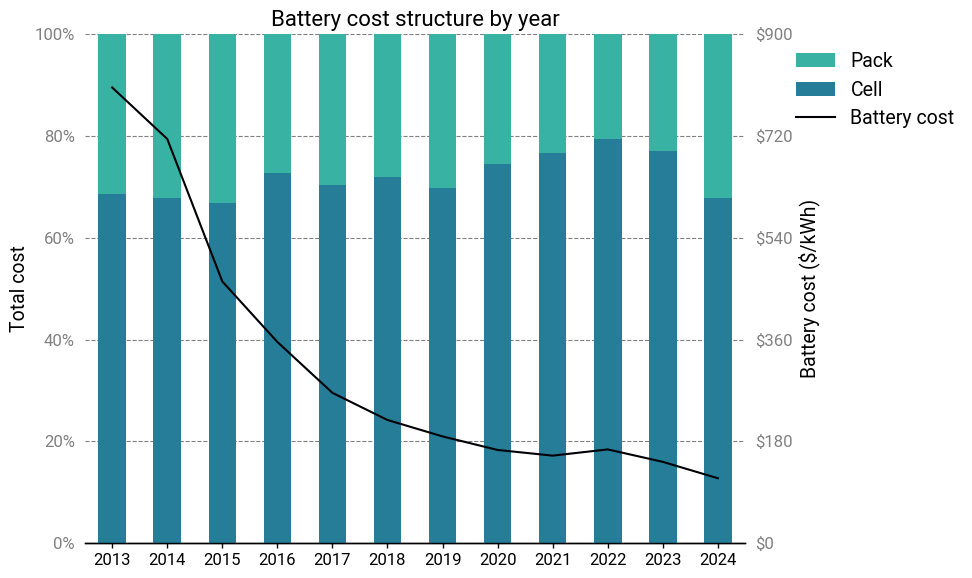

In [106]:
fig, ax = plt.subplots(1,1)



ax = battery_costs.drop(columns="Total").div(battery_costs["Total"], axis=0).plot.bar(ax=ax, stacked=True, zorder=3, color=tealgrn.mpl_colors)

# Add grey y-axis gridlines and change y-tick colors

ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), battery_costs["Total"], label="Battery cost")

# Remove all spines except bottom (x-axis)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove all spines except bottom (x-axis)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax.grid(axis='y', color='grey', linestyle='--', zorder=0)
ax.tick_params(axis='y', colors='grey', left=False, right=False)
ax.tick_params(axis='x', labelrotation=0)
ax2.tick_params(axis='y', colors='grey', left=False, right=False)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))
ax.set_ylim(0,1)
ax2.set_ylim(0.0, 900)
ax2.set_yticks(np.linspace(0, 900, 6))
ax.set_ylabel("Total cost")
ax2.set_ylabel("Battery cost ($/kWh)")
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:.0f}"))


lines, labels = ax.get_legend_handles_labels()
lines2, labels2= ax2.get_legend_handles_labels()


ax.legend(lines2+lines, labels2+labels , bbox_to_anchor=(1.05, 1), loc='upper left', reverse=True)

ax.set_title("Battery cost structure by year")
fig.set_size_inches(10,6)
fig.tight_layout()

# Wind energy

In [ ]:
years = np.arange(start=1998, stop = 2024)
lcoes = [0.130,0.125,0.109,0.103,0.097,0.086,0.095,0.084,0.095,0.094,0.107,0.120,0.111,0.118,0.100,0.082,0.068,0.061,0.056,0.049,0.046,0.041,0.036,0.032,0.029,0.038]
CFs = np.array([26,26,28,29,31,31,33,33,30,34,34,31,33,31,31,35,40,39,41,42,44,44,43,45,44,40])/100
OnM = np.array([58.2,56.8,55.4,54.2,53.1,51.9,50.8,49.6,48.5,47.3,46.2,45.2,41.0,39.9,39.2,40.8,]) #USD/kW/year
turbine_percent = np.array([75.6, 75,68, 68, 68.6, 68, 71,71,67.3,67.9,68.8,69,70.4,70.4,55.4,55.4])/100
turbine_cost = [1400, 1500, 1212, 1286, 1140, 1185, 1221, 1209, 1071, 1094, 1011, 991, 1021, 1030, 969, 1091]
capex = [2528,2402,2146,2126,2102,1813,2210,1912,1967,2297,2652,2778,2780,2756,2523,2334,2215,2118,2165,1960,1911,1807,1597,1533,1264,1501]

WACCs = np.array([0.08,0.08,0.08,0.08,0.08,0.088,0.087,0.083,0.0755,0.0759,0.0759,0.0623, 0.0523, 0.0537, 0.0623, 0.0625])
wind_data = pd.DataFrame({
    "LCOE": lcoes,
    "CF": CFs,
    "Installed cost": capex,
  
}, index=years)

wind_data.index.name = "Year"
wind_data["O&M"] = pd.Series(OnM, index=wind_data.index[-len(OnM):])
wind_data["WACC"] = pd.Series(WACCs, index=wind_data.index[-len(WACCs):])
wind_data["turbine cost"] = pd.Series(turbine_cost, index=wind_data.index[-len(turbine_cost):])
wind_data["nrel turbine pct"] = pd.Series(turbine_percent, index=wind_data.index[-len(turbine_percent):])

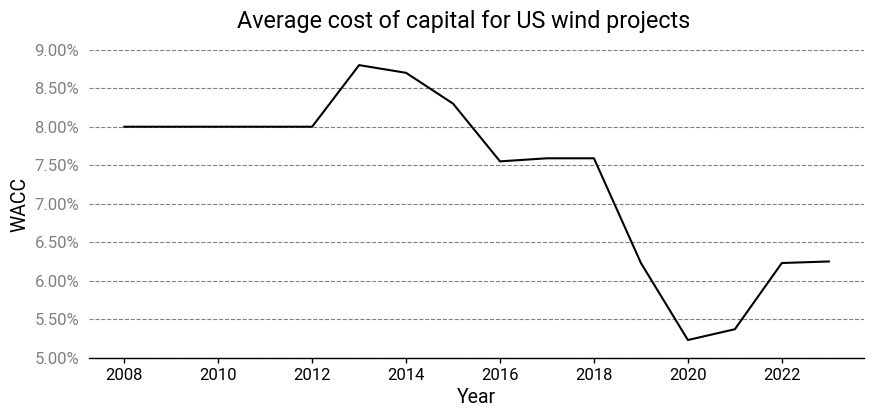

In [111]:
fig, ax = plt.subplots(1,1)

wind_data["WACC"].plot(ax=ax)

ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))
ax.set_ylabel("WACC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylim(0.05, 0.09)
# Add grey y-axis gridlines and change y-tick colors
ax.grid(axis='y', color='grey', linestyle='--', zorder=0)
ax.tick_params(axis='y', colors='grey', left=False)

fig.suptitle("Average cost of capital for US wind projects")
fig.set_size_inches(10,4)

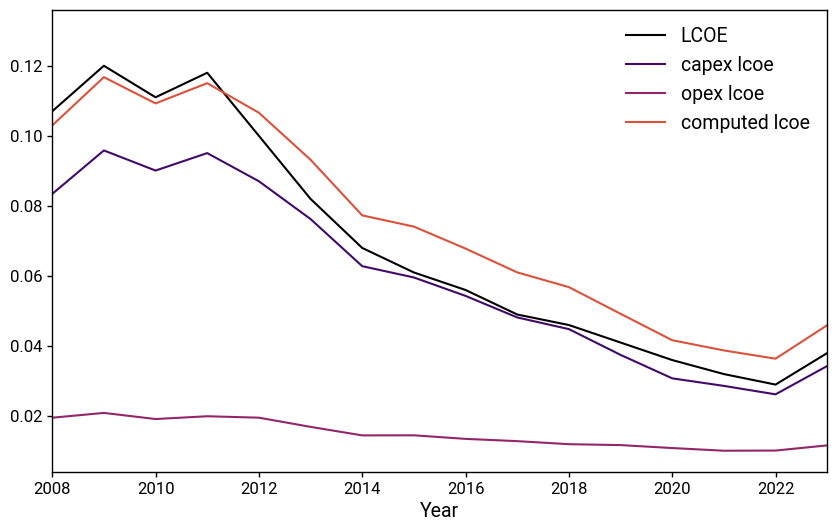

In [ ]:
from graphs import finance


CRF = finance.CRF(25, 0.065)
wind_data["CRF"] = finance.CRF(25, wind_data["WACC"])
wind_data["opex lcoe"] = wind_data["O&M"]/8760/wind_data["CF"]
wind_data["capex lcoe"] = wind_data["Installed cost"]*wind_data["CRF"]/wind_data["CF"]/8760
wind_data["computed lcoe"] = wind_data["capex lcoe"] + wind_data["opex lcoe"]
# wind_data["ptc"] = wind_data.loc[]
fig, ax = plt.subplots(1,1)

wind_data[["LCOE", "capex lcoe", "opex lcoe", "computed lcoe"]].plot(ax=ax)

ax.set_xlim(2008, 2023)
fig.set_size_inches(10, 6)

Ax limits: (np.float64(-0.5), np.float64(15.5))
Ax ticks: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


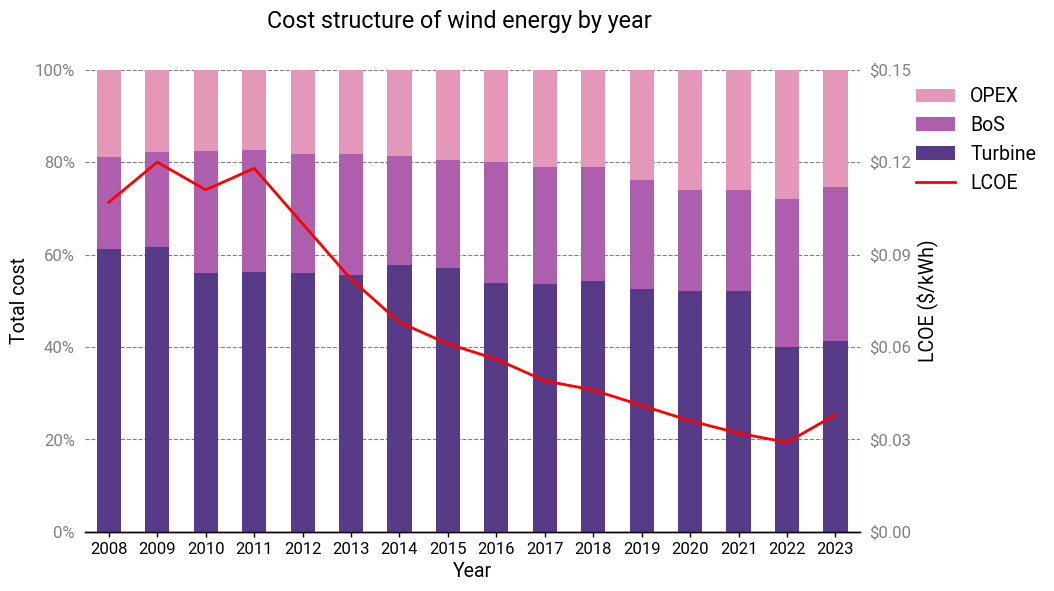

In [112]:
wind_data["normalized capex"] = wind_data["capex lcoe"]/wind_data["computed lcoe"]
wind_data["normalized opex"] = wind_data["opex lcoe"]/wind_data["computed lcoe"]
wind_data["OPEX"] = wind_data["opex lcoe"]/wind_data["computed lcoe"]
# wind_data["turbine"] = wind_data["turbine cost"]/wind_data["Installed cost"]*wind_data["normalized capex"]
wind_data["Turbine"] = wind_data["nrel turbine pct"]*wind_data["normalized capex"]
wind_data["BoS"] = wind_data["normalized capex"] - wind_data["Turbine"]
filtered = wind_data.dropna(subset=["normalized opex"])


fig, ax = plt.subplots(1,1)



ax = filtered[["Turbine", "BoS", "OPEX"]].plot.bar(ax=ax, stacked=True, color=purple.mpl_colors, zorder=3)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylim(0, 1)
ax.set_ylabel("Total cost")
# ax.set_title("Wind energy LCOE cost breakdown")



ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), filtered["LCOE"], label="LCOE", color="red", linewidth =2)
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:.2f}"))
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Add grey y-axis gridlines and change y-tick colors
ax.grid(axis='y', color='grey', linestyle='--', zorder=0)
ax.tick_params(axis='y', colors='grey',left=False, right = False)
ax.tick_params(axis='x', labelrotation=0)
ax2.tick_params(axis='y', colors='grey',left = False, right=False)

ax2.set_ylabel("LCOE ($/kWh)")
ax2.set_ylim(0.0, 0.15)
ax2.set_yticks(np.arange(0.0, 0.16, 0.03))

lines, labels = ax.get_legend_handles_labels()
lines2, labels2= ax2.get_legend_handles_labels()


ax.legend(lines2+lines, labels2+labels , bbox_to_anchor=(1.05, 1), loc='upper left', reverse=True)
# ax2.legend()
fig.set_size_inches(10, 6)
fig.suptitle("Cost structure of wind energy by year")

print(f"Ax limits: {ax.get_xlim()}")
print(f"Ax ticks: {ax.get_xticks()}")

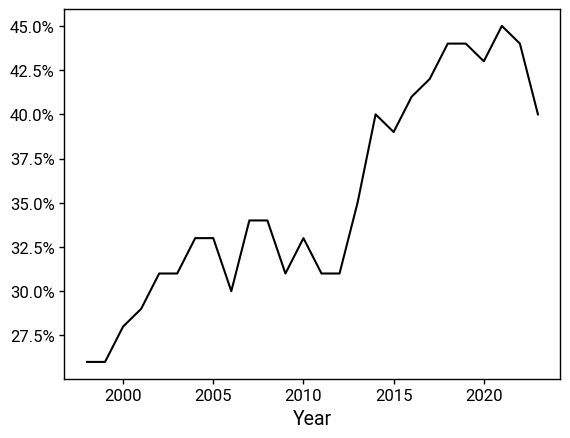

In [ ]:
fig, ax = plt.subplots(1,1)

ax = wind_data["CF"].plot(ax=ax)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))